<img
src="https://www.imt-atlantique.fr/sites/default/files/Images/Ecole/charte-graphique/IMT_Atlantique_logo_RVB_Baseline_400x272.jpg"
WIDTH=200 HEIGHT=200>

<CENTER>
    </br>
    <p><center><font size="5"> TAF MCE - 2019</span></center></p>
    <p><center><font size="4">  UE Numerical Methods </font><center></p>
    <p></p>
    <p><center><font size="5">  Notebook 03: Julia lab - constrained optimization </font></center></p>
    <p><font size="5"> <center>Student: Tales Marra </center></font></p>
    </p></br>
    </p>
</CENTER>

---------------------------

# <span style="color:#00B8DE">Constrained optimization</span>


Let us consider the following optimization problems

$$
(I) \left\{
\begin{array}{l}
\min_{x,y}(1-x)^2+100(y-x^2)^2\\
3x+y\ = 1
\end{array}
\right.
$$

and

$$
(II)\left\{
\begin{array}{l}
\min_{x,y}(1-x)^2+100(y-x^2)^2\\
(x+1)^2+(y-3)^2 \leq 1
\end{array}
\right.
$$

**1)** Plot the objective function and the constraints for both problems. 

**2)** Solve (I) with a Newton linearly constrained approach

**3)** Solve (II) with an interior point approach.


## <span style="color:#00B8DE">I - Objective and constraints plot

In [10]:
# Figure
using Plots
pyplot()

Plots.PyPlotBackend()

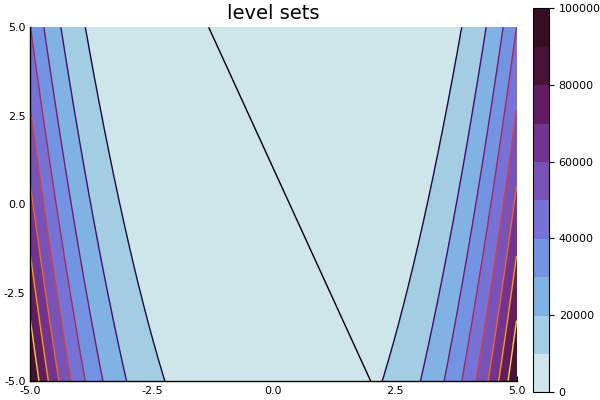

In [19]:
## for the first problem 
f1(x,y) = (1-x)^2+100*(y-x^2)^2 
h1(x,y) = 3*x+y-1

n = 100
x = range(-5,stop=5,length=n)
y = range(-5,stop=5,length=n)
X = repeat(x',n,1)
Y = repeat(y,1,n)
z = f1.(X,Y)
h11 = h1.(X,Y)
fig = contourf(X,Y,z,nlevels=10,c=:dense,label="",title= "level sets")
contour!(X,Y,z,nlevels=10,label="")
contour!(x,y,h11,nlevels=0,label="")

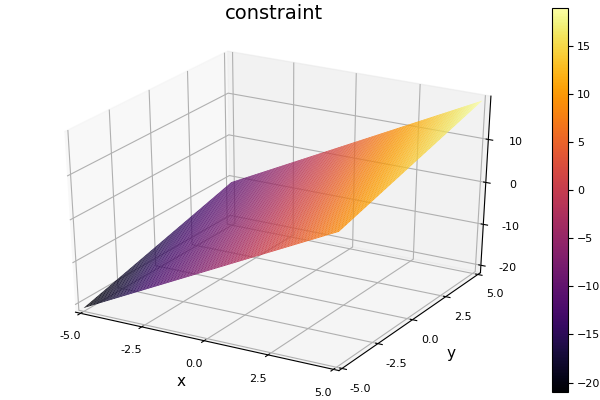

In [20]:
plot(x,y,h11,st=:surface,xlabel = "x",ylabel="y",title = "constraint")

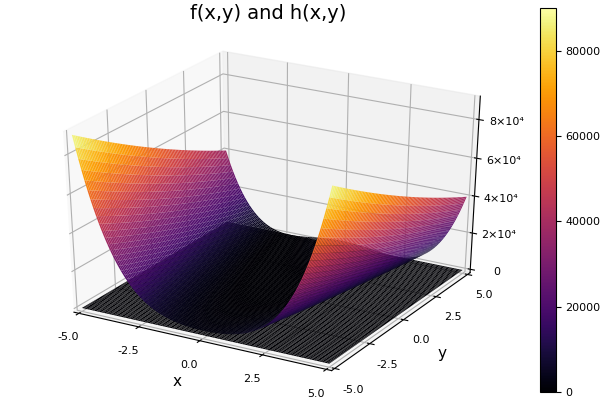

In [21]:
plot(x,y,z,st=:surface,xlabel = "x",ylabel="y",title = "f(x,y) and h(x,y)")
plot!(x,y,h11,st=:surface,xlabel = "x",ylabel="y",title = "f(x,y) and h(x,y)")

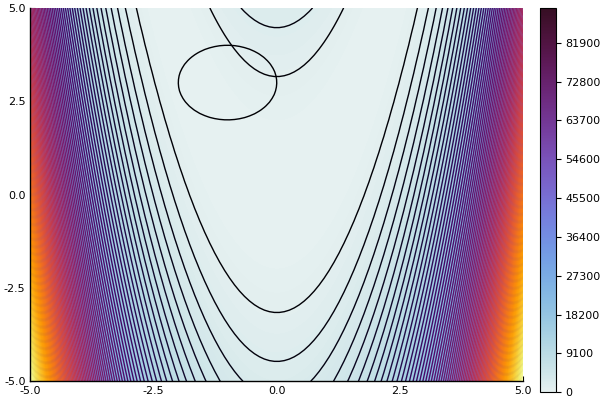

In [22]:
## for the second problem 
f2(x,y) = (1-x)^2 + 100*(y-x^2)^2 
h2(x,y) = (x+1)^2 + (y-3)^2 - 1

n = 100
x = range(-5,stop=5,length=n)
y = range(-5,stop=5,length=n)
X = repeat(x',n,1)
Y = repeat(y,1,n)
z2 = f2.(X,Y)
h_2 = h2.(X,Y)
fig = contourf(X,Y,z2,nlevels=1000,c=:dense,label="")
contour!(X,Y,z2,nlevels=100,label="")
contour!(X,Y,h_2,nlevels=0,label="")

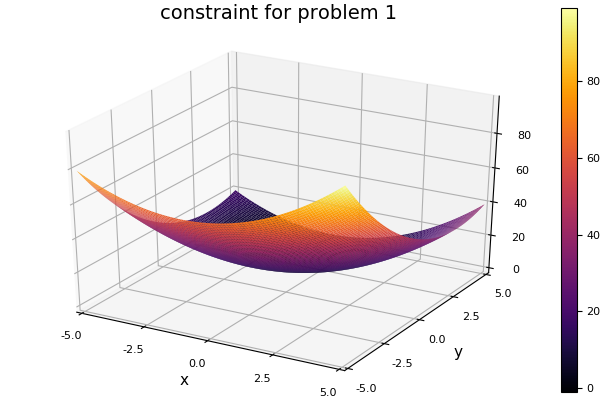

In [33]:
plot(x,y,h_2,st=:surface,xlabel = "x",ylabel="y",title = "constraint for problem 1")

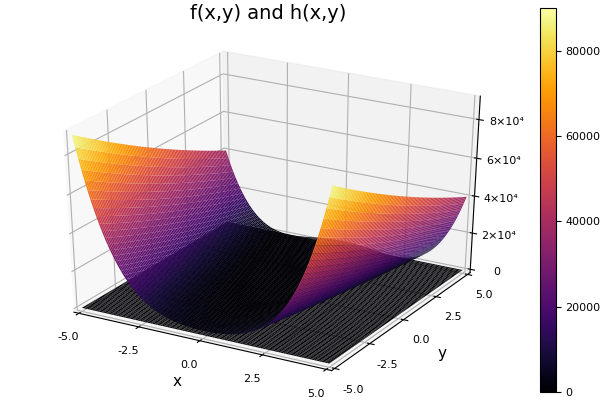

In [24]:
plot(x,y,z2,st=:surface,xlabel = "x",ylabel="y",title = "f(x,y) and h(x,y)")
plot!(x,y,h_2,st=:surface,xlabel = "x",ylabel="y",title = "f(x,y) and h(x,y)")

## <span style="color:#00B8DE">II - Linearly constrained Newton

In [4]:
∇f(x,y)  = [-2*(1-x)+200*(y-x^2)*(-2*x); 200*(y-x^2)]
∇2f(x,y) = [2-400*y+1200*x^2 -400*x; -400*x 200]

∇h1(x,y)  = [3; 1]

∇h1 (generic function with 1 method)

In [5]:
# Backtracking
#-------------
function backtracking(x,f,∇f,d)
    """
    bactracking: 
    see e.g. https://web.stanford.edu/~boyd/cvxbook/bv_cvxbook.pdf - p.464
    IN:
    ---
    x: initial point
    f, ∇f: function to be minimized and its gradient
    d: searc direction
    OUT:
    ----
    y: final point
    n: number of loops
    """
    α = 0.25 # backtracking parameters
    β           = 0.7
    t = 1
    n = 0
    while f(x[1] + t * d[1], x[2] + t * d[2]) > f(x[1], x[2]) + α * t * ∇f(x[1], x[2])' * d
        n += 1
        t = β*t
    end
    y = x + t * d
    return y,n
end

backtracking (generic function with 1 method)

In [35]:
#constrained Newton algorithm with backtracking
prec        = 1.e-8
init        = [1;5]
pt          = init
nb_iter_N   = 0  # number of loops
nb_loops_N  = 0  # number of inner loops count for backtracking
resu_N      = pt
A           = [3 1]
b           = 1
result = init
while true
    nb_iter_N   += 1
    M           = [∇2f(pt[1], pt[2]) A'; A 0]
    V           = [-∇f(pt[1], pt[2]); b.-A*pt]
    #print(size(V))
    h           =  inv(M) * V 
    h           = h[1:2]
    ∇           = ∇f(pt[1], pt[2])
    pt,n        = backtracking(pt,f,∇f,h)
    nb_loops_N  += n
    resu_N      = [resu_N pt]
    result = pt
    if (-∇'*h)/2 < prec  # ∇f(x+td)_{t=0}= ∇'*d
        break
    end
end

In [38]:
println("Number of iterations for constrained Newton = $nb_iter_N")
println("Number of inner loops for constrained Newton = $nb_loops_N")

Number of iterations for constrained Newton = 5
Number of inner loops for constrained Newton = 0


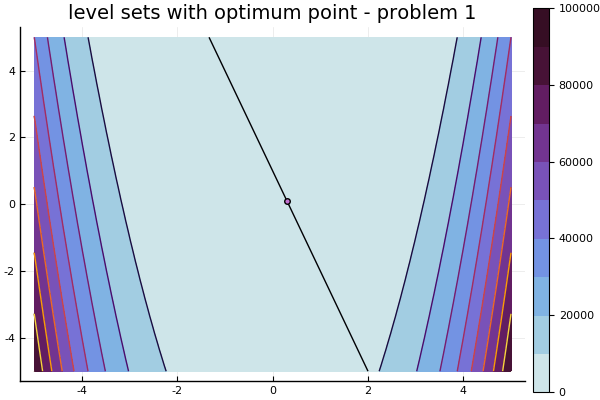

In [36]:
## for the first problem 
f1(x,y) = (1-x)^2+100*(y-x^2)^2 
h1(x,y) = 3*x+y-1
n = 100
x = range(-5,stop=5,length=n)
y = range(-5,stop=5,length=n)
X = repeat(x',n,1)
Y = repeat(y,1,n)
z = f1.(X,Y)
h11 = h1.(X,Y)
fig = contourf(X,Y,z,nlevels=10,c=:dense,label="",title= "level sets with optimum point - problem 1")
contour!(X,Y,z,nlevels=10,label="")
contour!(X,Y,h11,nlevels=0,label="")
scatter!([result[1]],[result[2]],label="")

## <span style="color:#00B8DE">III - Interior point method

In [16]:
f(x,y)   = (1-x)^2 + 100*(y-x^2)^2
h2(x,y)  = (x+1)^2 + (y-3)^2 - 1
∇h2(x,y)  = [2*(x+1); 2*(y-3)]

∇h2 (generic function with 1 method)

In [25]:
using LinearAlgebra: norm, eigen

prec        = 1.e-12
init        = [-1,3]  # center of the circle
pt          = init
nb_iter_IP  = 0  # number of loops
nb_loops_IP = 0  # number of inner loops count for backtracking
resu_IP     = pt
m           = 1
α           = 1.5
ν           = 10
t           = 10

phi(x,y) = -log(-h2(x,y))
dphi(x,y) = - ∇h2(x,y)./ h2(x,y)
F(x,y) = t * f(x,y) + phi(x,y)
∇F(x,y) = t * ∇f(x,y) + dphi(x,y)
result = init
while true
    nb_iter_IP += 1 

    for k=1:ν # inner loop
        #gradient
        d   = -∇F(pt[1], pt[2])
   
        while norm(pt+d-init)>1
            d = d * (0.5)
        end
        
        pt,n     = backtracking(pt,F,∇F,d)
        nb_loops_IP += n
        resu_IP = [resu_IP pt]
    end
    t = α*t

    if (m/t) < prec
        break
    end
    result = pt
end

In [26]:
println("Number of iterations for Interior point = $nb_iter_IP")
println("Number of inner loops for  Interior point = $nb_loops_IP")

Number of iterations for Interior point = 63
Number of inner loops for  Interior point = 13203


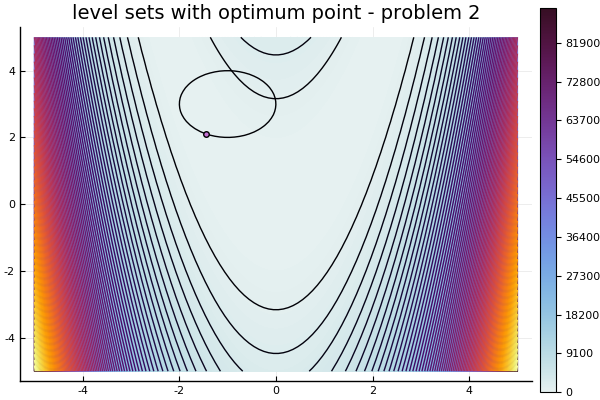

In [31]:
# Figure
fig = contourf(X,Y,z2,nlevels=1000,c=:dense,title="level sets with optimum point - problem 2")
contour!(X,Y,z2,nlevels=100,label="")
contour!(X,Y,h_2,nlevels=0,label="")
scatter!([result[1]],[result[2]],label="")